## Titanic Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data1 = pd.read_csv('titanic-training-data.csv')
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data1.shape

(891, 12)

In [5]:
data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data1.info()
# we can see missing values in Age,Cabin and emarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


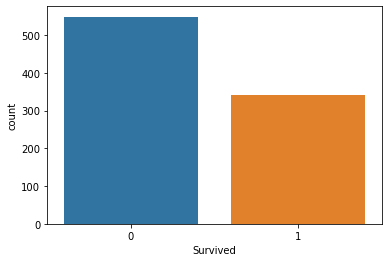

In [7]:
sns.countplot(x='Survived',data=data1)

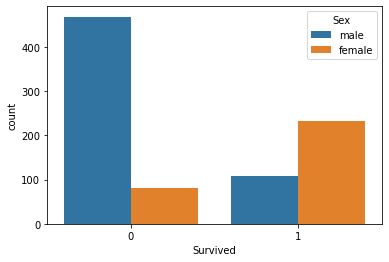

In [8]:
sns.countplot(x='Survived',hue='Sex',data=data1)

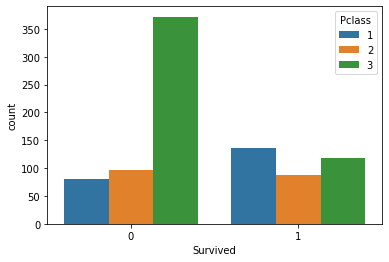

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=data1)

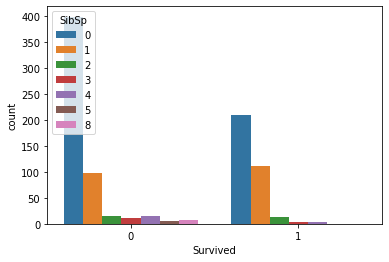

In [10]:
sns.countplot(x='Survived',hue='SibSp',data=data1)

In [11]:
data1.isnull().sum()
# count the missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

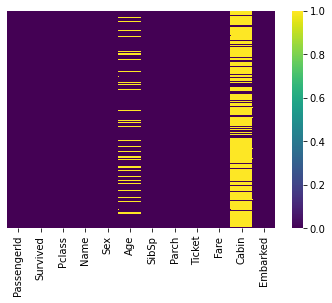

In [12]:
sns.heatmap(data1.isnull(),yticklabels=False,cmap='viridis')
# visualise the missing values

In [13]:
# inplace ==> It make these changes in the original dataframe
data1.drop(['Ticket','Cabin','Name','PassengerId'],axis=1,inplace=True)


In [14]:
data1.dropna(inplace=True)
# Dropping NA(missing) values

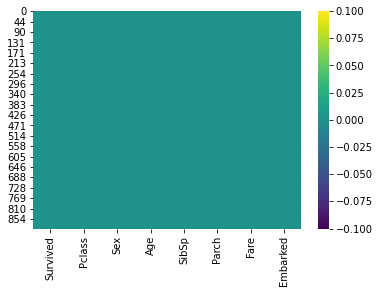

In [15]:
sns.heatmap(data1.isnull(),cmap='viridis')

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [17]:
# finding how many unique categories are present in the features
for i in data1.columns:
    print(i,':',len(data1[i].unique()),'labels')

Survived : 2 labels
Pclass : 3 labels
Sex : 2 labels
Age : 88 labels
SibSp : 6 labels
Parch : 7 labels
Fare : 219 labels
Embarked : 3 labels


### One hot encoding for categorial variables

In [18]:
data_emb=pd.get_dummies(data1.Embarked,drop_first=True)


In [19]:
data_sex=pd.get_dummies(data1.Sex,drop_first=True)

In [20]:
data_class=pd.get_dummies(data1.Pclass,drop_first=True)

In [21]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
data_med=data1.drop(columns=['Pclass','Sex','Embarked'])

In [23]:
data_final = pd.concat([data_med,data_sex,data_emb,data_class],axis=1)
data_final

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


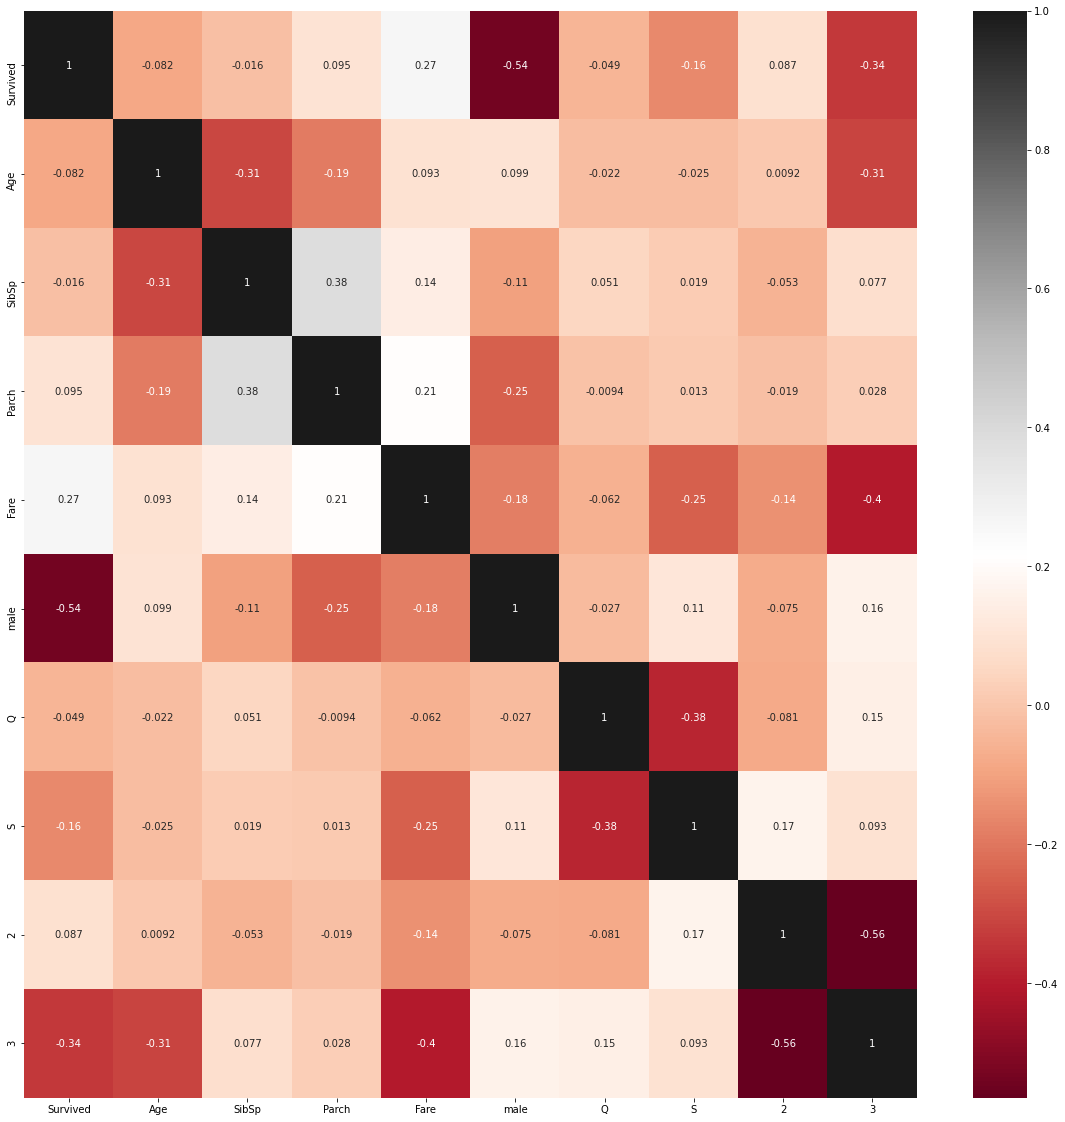

In [24]:
plt.figure(figsize= (20,20))
heatmap = sns.heatmap(data_final.corr(),annot=True,cmap='RdGy')

### Model Building

### Assign x and y variables

In [25]:
x = data_final.drop('Survived',axis=1)
y = data_final[['Survived']]


### Train and Test split

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
len(y_train)

498

In [28]:
len(y_test)

214

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
Log_reg = LogisticRegression()

In [31]:
Log_reg.fit(x_train,y_train)

C:\Users\Ankit Rawat\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ankit Rawat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_test.reset_index(drop='index',inplace=True)
y_test

,Survived
0,1
1,1
2,0
3,1
4,1
...,...
209,0
210,0
211,0
212,0


In [33]:
a = Log_reg.predict(x_test)
y_pred = pd.DataFrame(data=a,columns=['Prediction'])
y_pred

,Prediction
0,1
1,0
2,0
3,1
4,1
...,...
209,1
210,0
211,0
212,0


In [34]:
compare = pd.concat([y_test,y_pred],axis=1)
compare

,Survived,Prediction
0,1,1
1,1,0
2,0,0
3,1,1
4,1,1
...,...,...
209,0,1
210,0,0
211,0,0
212,0,0


In [35]:
Log_reg.score(x_train,y_train)

0.8032128514056225

In [36]:
Log_reg.score(x_test,y_test)

0.7710280373831776

In [37]:
# How??
Log_reg.score(x_test,y_pred)

1.0

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7710280373831776

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))                    

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       126
           1       0.72      0.72      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [40]:
x.head(1)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.25,1,0,1,0,1


In [41]:
Log_reg.predict_proba([[21,1,2,56,0,0,0,0,0]])[:,1]

array([0.92784046])

In [43]:
import pickle
pickle_out = open('titanic_log_reg_flask.pkl','wb')
pickle.dump(Log_reg,pickle_out)
Log_final = pickle.load(open('titanic_log_reg_flask.pkl','rb'))

## Thank You